<a href="https://colab.research.google.com/github/dngdat/AI/blob/main/future_prediction_on_fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [4]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/fingerprint', target_size = (150,150), batch_size = 32, class_mode ='categorical')

Found 5330 images belonging to 3 classes.


In [5]:
training_set.class_indices

{'A-E': 0, 'A-H': 1, 'A-M': 2}

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (150,150,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [7]:
train = model.fit(training_set, epochs = 20, batch_size = 128, verbose = 1)

Epoch 1/20
167/167 [==============================] - 827s 5s/step - loss: 0.9958 - accuracy: 0.4884
Epoch 2/20
167/167 [==============================] - 277s 2s/step - loss: 0.8897 - accuracy: 0.5674
Epoch 3/20
167/167 [==============================] - 271s 2s/step - loss: 0.8677 - accuracy: 0.5803
Epoch 4/20
167/167 [==============================] - 268s 2s/step - loss: 0.8297 - accuracy: 0.6028
Epoch 5/20
167/167 [==============================] - 268s 2s/step - loss: 0.7837 - accuracy: 0.6334
Epoch 6/20
167/167 [==============================] - 246s 1s/step - loss: 0.7405 - accuracy: 0.6610
Epoch 7/20
167/167 [==============================] - 248s 1s/step - loss: 0.7067 - accuracy: 0.6672
Epoch 8/20
167/167 [==============================] - 247s 1s/step - loss: 0.6688 - accuracy: 0.6887
Epoch 9/20
167/167 [==============================] - 248s 1s/step - loss: 0.6122 - accuracy: 0.7205
Epoch 10/20
167/167 [==============================] - 247s 1s/step - loss: 0.5874 - accura

In [8]:
Score = model.evaluate(training_set, verbose = 0)
print('Ham mat mat', Score[0])
print('Do chinh xac', Score[1])

Ham mat mat 0.3476327061653137
Do chinh xac 0.8459662199020386


In [9]:
model.save('FPOF.h5')
model_CNN = load_model('FPOF.h5')

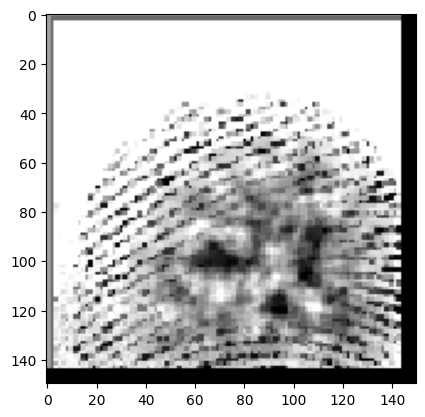

1/1 [==============================] - 0s 61ms/step
là người độc lập, vững chãi, khó bị lung lay


In [13]:
filename = "/content/drive/MyDrive/fingerprint/A-H/541__M_Left_thumb_finger_Obl.BMP"
img = load_img(filename,target_size = (150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("thể hiện một người chăm chỉ, siêng năng")
if(kq == 1):
    print("là người độc lập, vững chãi, khó bị lung lay")
if(kq == 2):
    print("là người có kỳ vọng cao, sống theo chủ nghĩa toàn cầu")

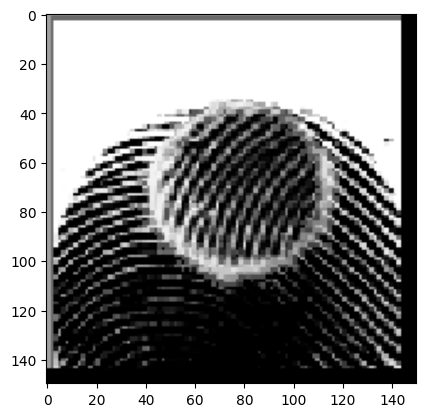

1/1 [==============================] - 0s 55ms/step
là người có kỳ vọng cao, sống theo chủ nghĩa toàn cầu


In [12]:
filename = "/content/drive/MyDrive/fingerprint/A-M/397__M_Right_middle_finger_CR.BMP"
img = load_img(filename,target_size = (150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("thể hiện một người chăm chỉ, siêng năng")
if(kq == 1):
    print("là người độc lập, vững chãi, khó bị lung lay")
if(kq == 2):
    print("là người có kỳ vọng cao, sống theo chủ nghĩa toàn cầu")
